In [95]:
from bs4 import BeautifulSoup
import requests
import json

url = 'https://www.fotmob.com/en-GB/matches/real-madrid-vs-shakhtar-donetsk/2sdar9#4010154'

response = requests.get(url)


if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    data_element = soup.find('script', {'type': 'application/json'})

    if data_element:
        data_json = json.loads(data_element.text)
        with open('shakhtar-rm.json', 'w') as file:
            json.dump(data_json, file, indent=4)

In [2]:
import json
with open('shakhtar-rm.json', 'r') as file:
    data = json.load(file)

main_content = data['props']['pageProps']['content']

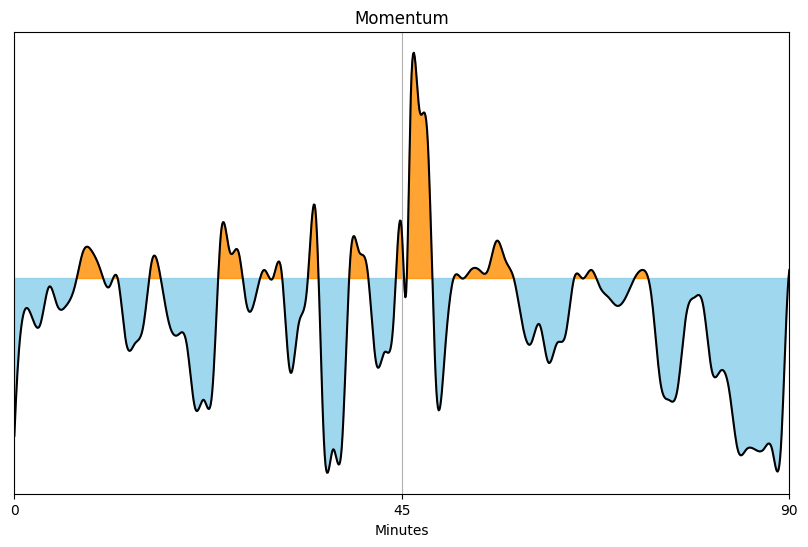

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.interpolate import interp1d


momentum_data = main_content['matchFacts']['momentum']['main']['data']


def print_momentum_data(data: dict):

    minutes = np.array([entry['minute'] for entry in data])
    values = np.array([entry['value'] for entry in data])

    unique_minutes, unique_indices = np.unique(minutes, return_index=True)
    unique_values = values[unique_indices]

    interpolation_model = interp1d(
        unique_minutes, unique_values, kind="cubic", fill_value="extrapolate")

    X_ = np.linspace(0, 90, 1000)

    Y_ = interpolation_model(X_)

    plt.figure(figsize=(10, 6))

    plt.fill_between(X_, Y_, where=(Y_ < 0),
                     interpolate=True, color='skyblue', alpha=0.8)

    plt.fill_between(X_, Y_, where=(Y_ >= 0),
                     interpolate=True, color='darkorange', alpha=0.8)

    plt.plot(X_, Y_, color='black')
    plt.xlim(0, 90)
    plt.xticks(np.arange(0, 91, step=45))
    plt.yticks([])
    plt.grid(True, axis='x')

    plt.xlabel('Minutes')
    plt.title('Momentum')

    plt.show()


print_momentum_data(momentum_data)

In [5]:
import re


def show_stats_data(data: dict):
    labels = list(data.keys())
    values = list(data.values())

    def extract_numeric(value):
        if isinstance(value, str):
            # Extract numeric part using regular expression
            numeric_part = re.search(r'\d+(\.\d+)?', value)
            if numeric_part:
                return float(numeric_part.group())
        return float(value)

    float_values = [[extract_numeric(value)
                    for value in sublist] for sublist in values]

    first_team = [el[0] for el in float_values]
    second_team = [el[1] for el in float_values]

    home_padding_arr = []
    for index, arr in enumerate(first_team):
        home_padding_arr.append(max(first_team) - arr)

    p1 = plt.barh(labels, first_team, left=home_padding_arr,
                  color='darkorange', label='Shakhtar')
    p2 = plt.barh(labels, second_team, left=max(
        first_team), color='skyblue', label='Real Madrid')
    plt.bar_label(p1, label_type='center', padding=-20, color='#001219')
    plt.bar_label(p2, label_type='center', padding=20, color='#001219')

    plt.legend()
    plt.show()

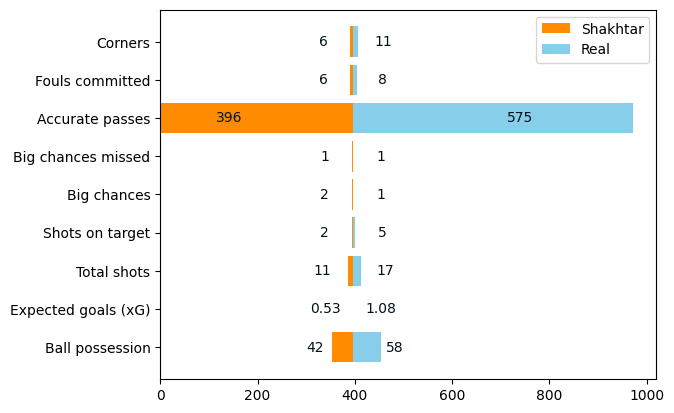

In [288]:
stats_data = main_content['stats']['Periods']['All']['stats'][0]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']

show_stats_data(data)

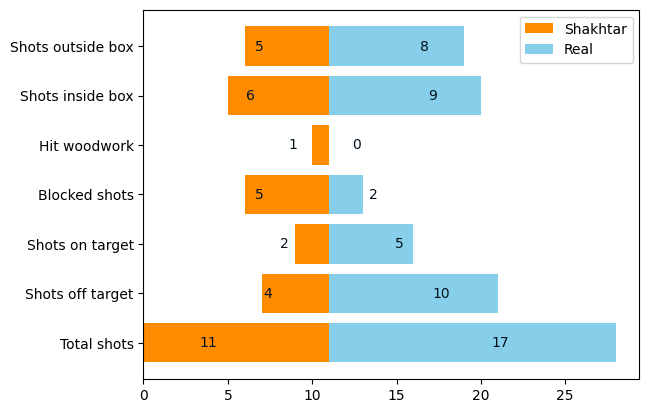

In [289]:
stats_data = main_content['stats']['Periods']['All']['stats'][1]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']


show_stats_data(data)

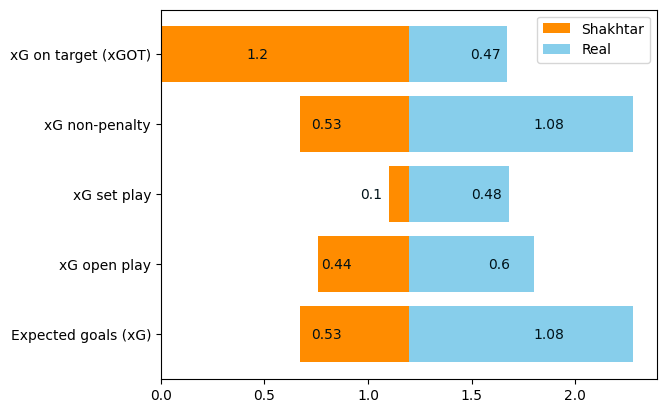

In [296]:
stats_data = main_content['stats']['Periods']['All']['stats'][2]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']


show_stats_data(data)

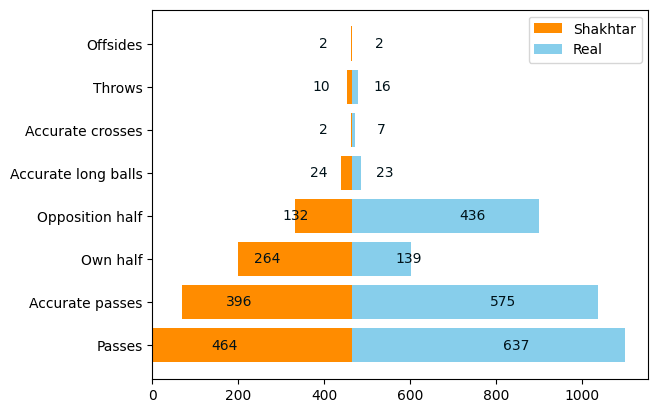

In [290]:
stats_data = main_content['stats']['Periods']['All']['stats'][3]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']


show_stats_data(data)

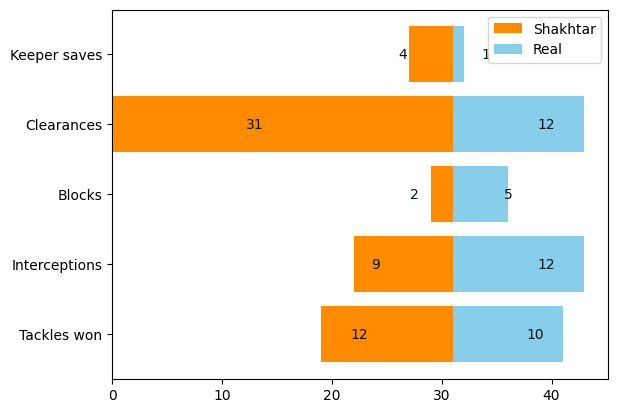

In [292]:
stats_data = main_content['stats']['Periods']['All']['stats'][4]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']


show_stats_data(data)

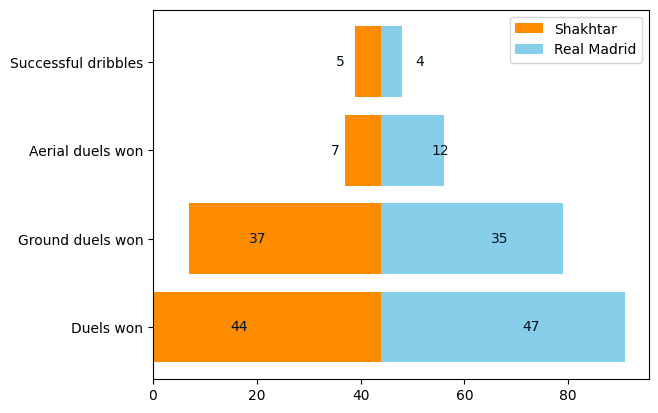

In [8]:
stats_data = main_content['stats']['Periods']['All']['stats'][5]['stats']
data = {}

for el in stats_data:
    if (el['stats'][0]):
        data[el['title']] = el['stats']


show_stats_data(data)

[{'x': 91.7, 'y': 25.1290625, 'color': 'darkorange'}, {'x': 93, 'y': 24.699872616500002, 'color': 'darkorange'}, {'x': 85.06470588159999, 'y': 48.695031844599995, 'color': 'darkorange'}, {'x': 81.80922330160001, 'y': 23.2985987305, 'color': 'darkorange'}, {'x': 98.0526315785, 'y': 31.1025, 'color': 'green'}, {'x': 94.5789473669, 'y': 45.752356684000006, 'color': 'darkorange'}, {'x': 101.8706896554, 'y': 22.037452233099998, 'color': 'darkorange'}, {'x': 76.8538834968, 'y': 17.4132484093, 'color': 'darkorange'}, {'x': 102.155172414, 'y': 19.725350321199997, 'color': 'darkorange'}, {'x': 80.908252428, 'y': 43.790573243599994, 'color': 'darkorange'}, {'x': 81.6966019424, 'y': 37.732, 'color': 'darkorange'}]


Text(0.5, 1.0, 'Shakhtar Shot Map')

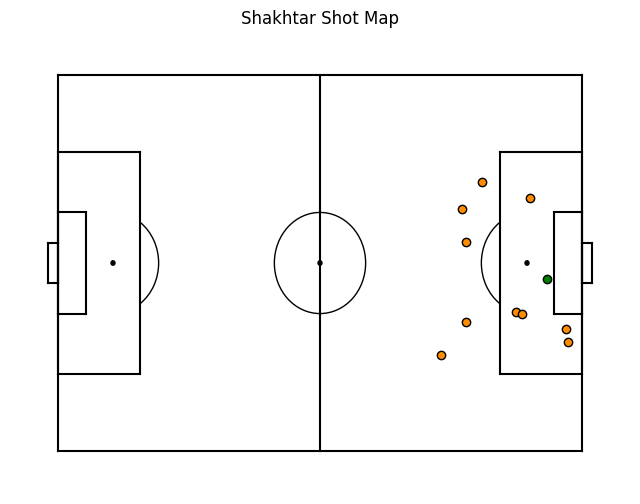

In [136]:
import matplotsoccer

shots_data = main_content['shotmap']['shots']

first_team_shots = []
second_team_shots = []

for el in shots_data:
    if el['teamId'] != 8633:
        first_team_shots.append(
            {'x': el['x'], 'y': el['y'], 'color': 'green' if el['eventType'] == 'Goal' else 'darkorange'})
    else:
        second_team_shots.append(
            {'x': el['x'], 'y': el['y'], 'color': 'green' if el['eventType'] == 'Goal' else 'skyblue'})

matplotsoccer.field("white", figsize=8, show=False)
print(first_team_shots)

for el in first_team_shots:
    plt.scatter(el['x'], el['y'], color=el['color'],
                edgecolors='black', linewidths=1)

plt.title('Shakhtar Shot Map')

Text(0.5, 1.0, 'Real Madrid Shot Map')

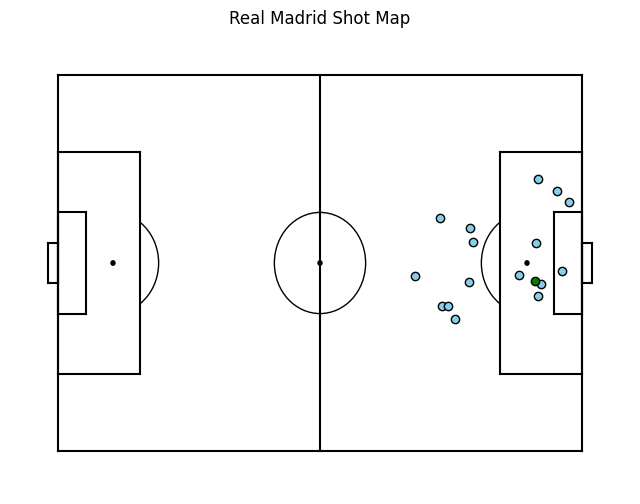

In [135]:
matplotsoccer.field("white", figsize=8, show=False)
for el in second_team_shots:
    plt.scatter(el['x'], el['y'], color=el['color'],
                edgecolors='black', linewidths=1)

plt.title('Real Madrid Shot Map')